# 🌱 Soil Fertility Prediction using Deep Learning (Keras)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## 📥 Load and Explore Dataset

In [2]:
# Load dataset (change path if needed)
df = pd.read_csv("Soil Fertility Data (Modified Data).csv")
df.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


## 🔍 Data Preprocessing

In [3]:
# Split features and labels
X = df.drop(columns=['fertility'])
y = df['fertility']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target variable
y_cat = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

## 🧠 Build Deep Learning Model

In [4]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,603 (68.76 KB)

 Trainable params: 17,603 (68.76 KB)

 Non-trainable params: 0 (0.00 B)

## 🚀 Train the Model

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4822 - loss: 1.0191 - val_accuracy: 0.6550 - val_loss: 0.7290
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6626 - loss: 0.7320 - val_accuracy: 0.7442 - val_loss: 0.5846
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7072 - loss: 0.6413 - val_accuracy: 0.7558 - val_loss: 0.5245
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7439 - loss: 0.5752 - val_accuracy: 0.7829 - val_loss: 0.4773
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7735 - loss: 0.5295 - val_accuracy: 0.8062 - val_loss: 0.4650
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7840 - loss: 0.5088 - val_accuracy: 0.8023 - val_loss: 0.4311
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8015 - loss: 0.4593 - val_accuracy: 0.8217 - val_loss: 0.4117
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7856 - loss: 0.4951 - val_accuracy: 0.8178 - val_loss

## 📈 Accuracy & Loss Graphs

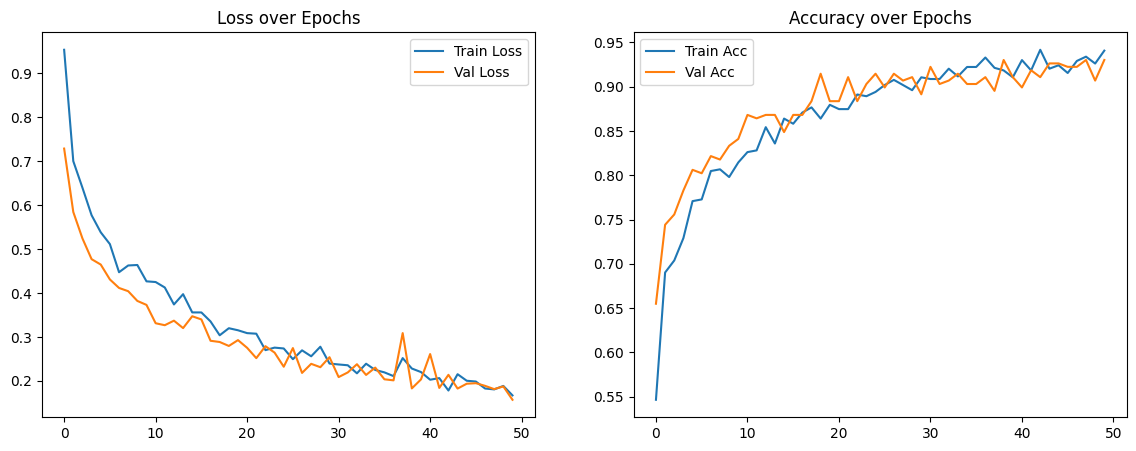

In [6]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

## ✅ Evaluation on Test Set

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        86
           1       0.91      0.89      0.90        87
           2       0.96      1.00      0.98        85

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



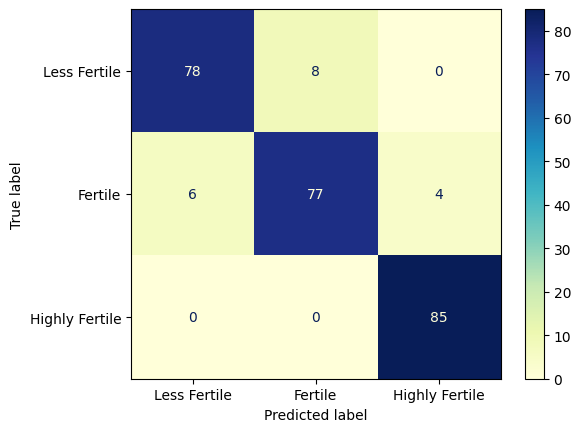

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Less Fertile", "Fertile", "Highly Fertile"])
disp.plot(cmap='YlGnBu')
plt.show()